In [3]:
#######################################################
##### STRIP TWEET #####################################
#######################################################

import nltk
import string
import re

f = open("train2017.tsv")
line = f.readline()

tweets = []
translate_table = dict((ord(char), None) for char in string.punctuation)   
cnt = 1
while line:
    pretext = ' '.join(line.split()[3:])
    pretext = ' '.join(word for word in pretext.split(' ') if not word.startswith('@')) #remove @user
    pretext = re.sub(r"http\S+", "", pretext) #remove link
    pretext = pretext.translate(translate_table) #remove symbols 
    #remove numbers??
    
    tweet = {
        "sentiment": ' '.join(line.split()[2:3]),
        "text": pretext.lower()
    }
    tweets.append(tweet)
    line = f.readline()
    cnt += 1

print("finish1")

finish1


In [4]:
#######################################################
##### TOKENIZATION ####################################
#######################################################

from nltk import word_tokenize

for tweet in tweets:
    tweet["text"] = word_tokenize(tweet["text"])

print("finish2")

finish2


In [5]:
from nltk import pos_tag

from nltk.corpus import wordnet
from nltk.stem import  WordNetLemmatizer
# Lemmatize with POS Tag

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

for tweet in tweets:
    lemmatized = []
    for word in tweet["text"]:
        lemmatized.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
    tweet["text"] = lemmatized

print("finish3")

finish3


{'sentiment': 'positive', 'text': ['gas', 'by', 'my', 'house', 'hit', '339', 'im', 'go', 'to', 'chapel', 'hill', 'on', 'sat']}


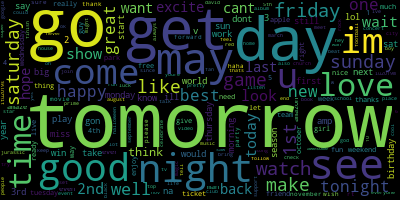

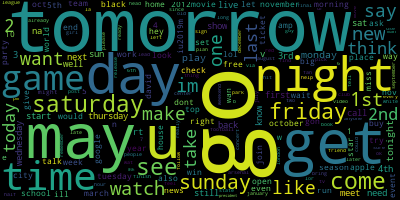

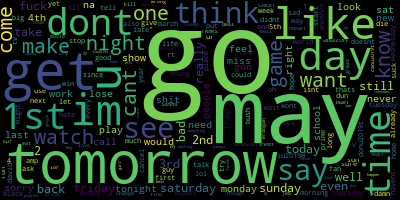

In [7]:
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

filtered_positive = []
filtered_neutral = []
filtered_negative = []

print(tweets[0])

for tweet in tweets:
    if tweet['sentiment'] == "positive":
        filtered_positive += [w for w in tweet["text"] if not w in stopwords.words('english')]
    if tweet['sentiment'] == "neutral":
        filtered_neutral += [w for w in tweet["text"] if not w in stopwords.words('english')]
    if tweet['sentiment'] == "negative":
        filtered_negative += [w for w in tweet["text"] if not w in stopwords.words('english')]

total_text = filtered_positive + filtered_neutral + filtered_negative

positive_count = Counter(filtered_positive)
neutral_count = Counter(filtered_neutral)
negative_count = Counter(filtered_negative)    
total_count = Counter(total_text)

#print(positive_count.most_common(10))
#print(neutral_count.most_common(10))
#print(negative_count.most_common(10))
#print(total_count.most_common(10))



wordcloud = WordCloud().generate_from_frequencies(dict(positive_count))
image = wordcloud.to_image()
display(image)

wordcloud = WordCloud().generate_from_frequencies(dict(neutral_count))
image = wordcloud.to_image()
display(image)

wordcloud = WordCloud().generate_from_frequencies(dict(negative_count))
image = wordcloud.to_image()
display(image)
